<a href="https://colab.research.google.com/github/Keerthi-vasan18/Data_Analysis/blob/main/Sales_Data_Analysis_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

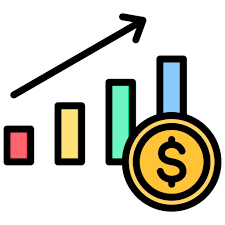

# **SALES DATA ANALYSIS**

**Consider Sales dataset and analyse it in a proper way. expectation: need A clarity on who is spending more money for shopping incase of gender,age_group,state,Occupation,Product_category,marital_status.**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=pd.read_csv('sales_data.csv',encoding='ISO-8859-1')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


### **DATA CLEANING**

In [63]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [64]:
df.shape

(11251, 15)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [66]:
# Removing unwanted columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [67]:
# Dropping Nan values in Amount column
df.dropna(inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [69]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

In [70]:
# Resetting the index
df.reset_index(inplace=True)

In [71]:
# Removing index column
df.drop('index',axis=1,inplace=True)

In [72]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11227,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11228,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11229,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [73]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [74]:
#changing data in Gender col
df['Gender']=df['Gender'].map({'F':'Female','M':'Male'})
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [75]:
# Renaming column name Marital_Status to Marital
df.rename(columns={'Marital_Status':'Marital'},inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [76]:
# Changing the data present in Marital Col
df['Marital']=df['Marital'].map({0:'Unmarried',1:'Married'})
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [77]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11231 non-null  int64  
 1   Cust_name         11231 non-null  object 
 2   Product_ID        11231 non-null  object 
 3   Gender            11231 non-null  object 
 4   Age Group         11231 non-null  object 
 5   Age               11231 non-null  int64  
 6   Marital           11231 non-null  object 
 7   State             11231 non-null  object 
 8   Zone              11231 non-null  object 
 9   Occupation        11231 non-null  object 
 10  Product_Category  11231 non-null  object 
 11  Orders            11231 non-null  int64  
 12  Amount            11231 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB


### **DATA VISUALIZATION**

In [101]:
# DATA LABELS
def data_label(a):
  for i in a.containers:
    a.bar_label(i)

### **Visualizing Gender column**

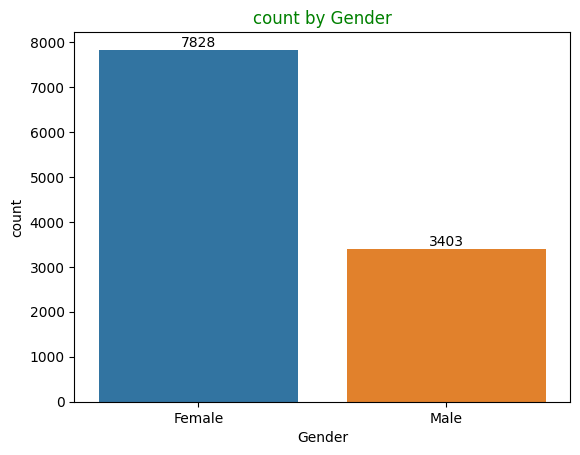

In [104]:
a=sns.countplot(x='Gender',data=df,hue='Gender')
plt.title('count by Gender',color='green')
data_label(a)

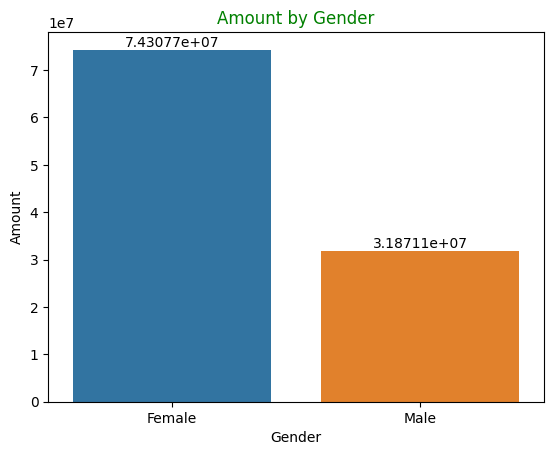

In [80]:
Gen=df.groupby('Gender')['Amount'].sum()
Gen=pd.DataFrame(Gen)
a=sns.barplot(x='Gender',y='Amount',data=Gen,hue='Gender')
plt.title('Amount by Gender',color='Green')
data_label(a)

**Female are spending more compared to males**

### **Visualizing Age Group**

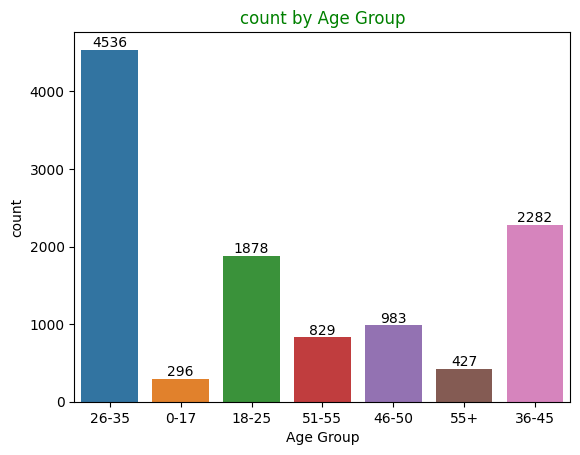

In [105]:
a=sns.countplot(x='Age Group',data=df,hue='Age Group')
plt.title('count by Age Group',color='green')
data_label(a)

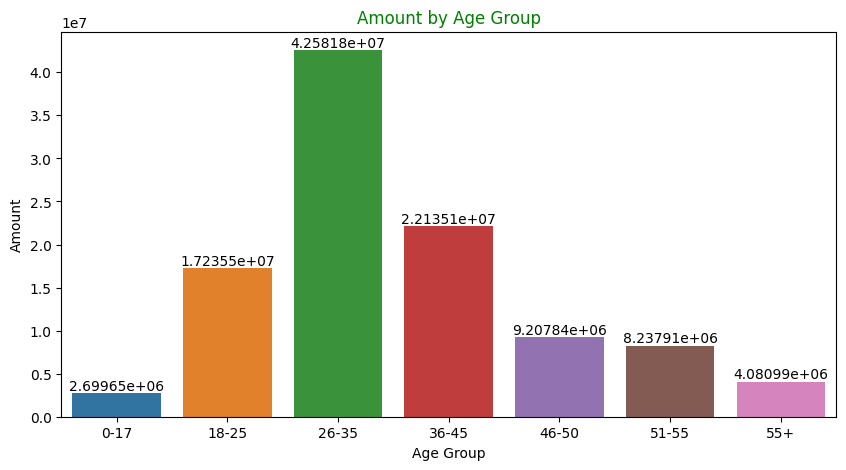

In [82]:
age=df.groupby('Age Group')['Amount'].sum()
age=pd.DataFrame(age)
plt.figure(figsize=(10,5))
a=sns.barplot(x='Age Group',y='Amount',data=age,hue='Age Group')
plt.title('Amount by Age Group',color='Green')
data_label(a)

**customers within age group of 26-35 are spending more**

### **Visualizing Marital**

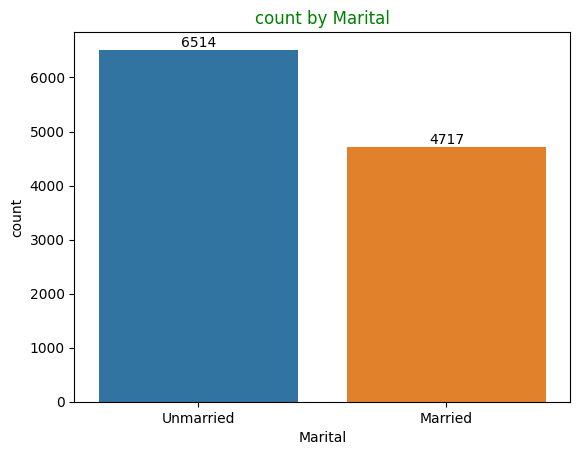

In [106]:
a=sns.countplot(x='Marital',data=df,hue='Marital')
plt.title('count by Marital',color='green')
data_label(a)

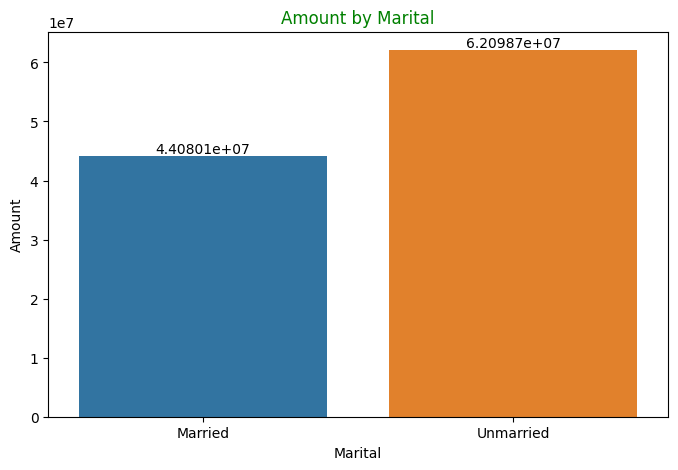

In [95]:
Marital=df.groupby('Marital')['Amount'].sum()
Marital=pd.DataFrame(Marital)
plt.figure(figsize=(8,5))
a=sns.barplot(x='Marital',y='Amount',data=Marital,hue='Marital')
plt.title('Amount by Marital',color='Green')
data_label(a)

**Customers who are single are spending more amount**

### **Visualizing State column**

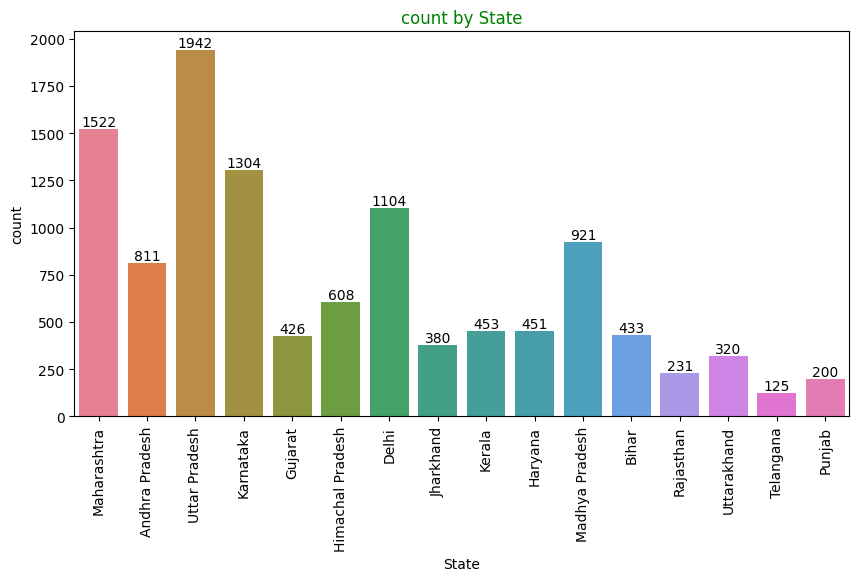

In [107]:
plt.figure(figsize=(10,5))
a=sns.countplot(x='State',data=df,hue='State')
plt.title('count by State',color='green')
plt.xticks(rotation=90)
data_label(a)

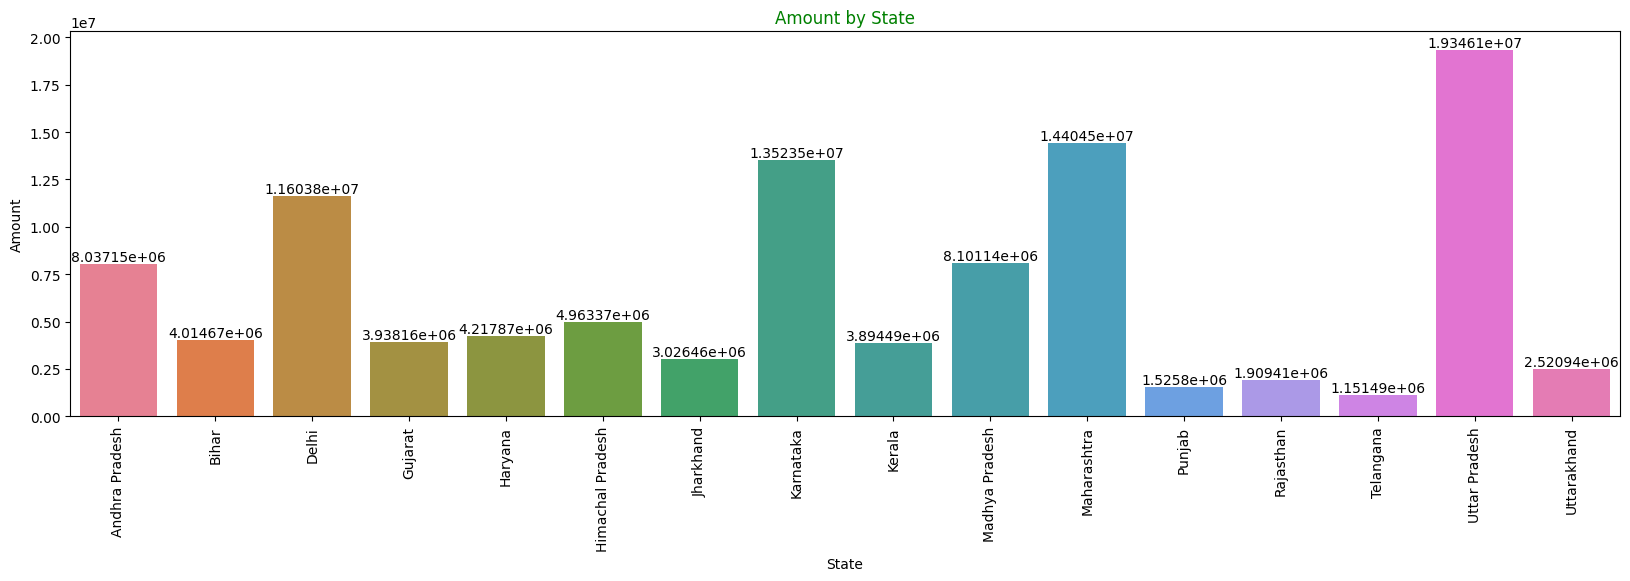

In [86]:
plt.figure(figsize=(20,5))
State=df.groupby('State')['Amount'].sum()
State=pd.DataFrame(State)
a=sns.barplot(x='State',y='Amount',data=State,hue='State')
plt.title('Amount by State',color='Green')
plt.xticks(rotation=90)
data_label(a)

**Amount spend is more in Uttar Pradesh, Maharashtra, karnataka, delhi ,madhyapradesh, Andhra pradesh**

### **Visualizing Zone**

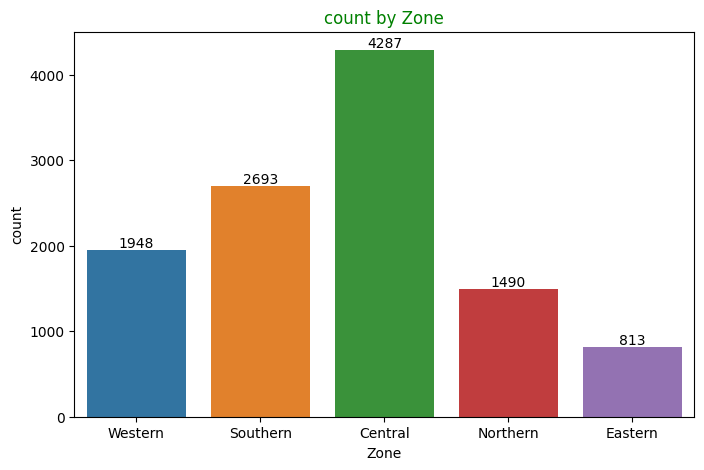

In [108]:
plt.figure(figsize=(8,5))
a=sns.countplot(x='Zone',data=df,hue='Zone')
plt.title('count by Zone',color='green')
data_label(a)

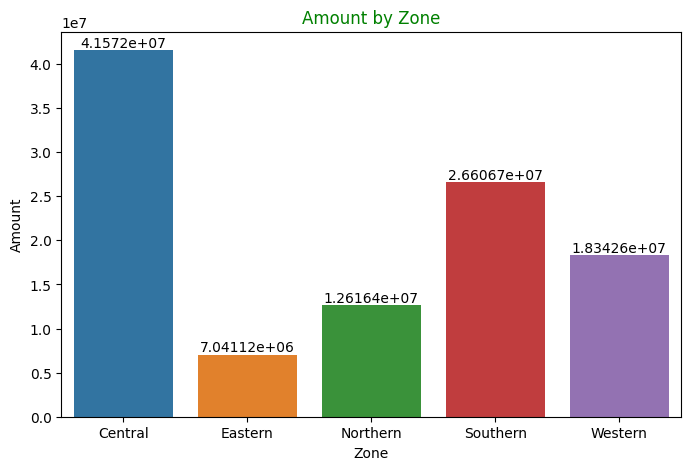

In [100]:
plt.figure(figsize=(8,5))
Zone=df.groupby('Zone')['Amount'].sum()
Zone=pd.DataFrame(Zone)
a=sns.barplot(x='Zone',y='Amount',data=Zone,hue='Zone')
plt.title('Amount by Zone',color='Green')
data_label(a)

**Compare to other Zones peoples are spending more money in Central zone**

### **Visualizing occupation**

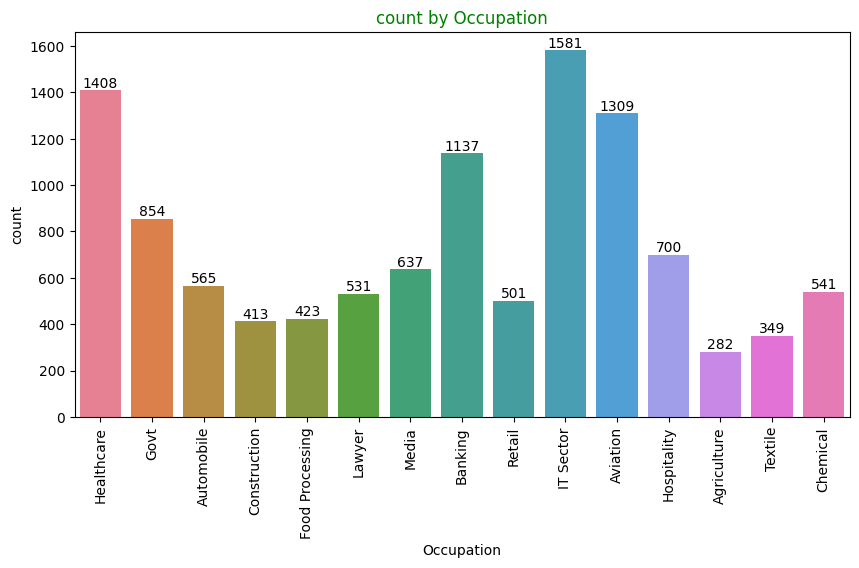

In [109]:
plt.figure(figsize=(10,5))
a=sns.countplot(x='Occupation',data=df,hue='Occupation')
plt.title('count by Occupation',color='green')
plt.xticks(rotation=90)
data_label(a)

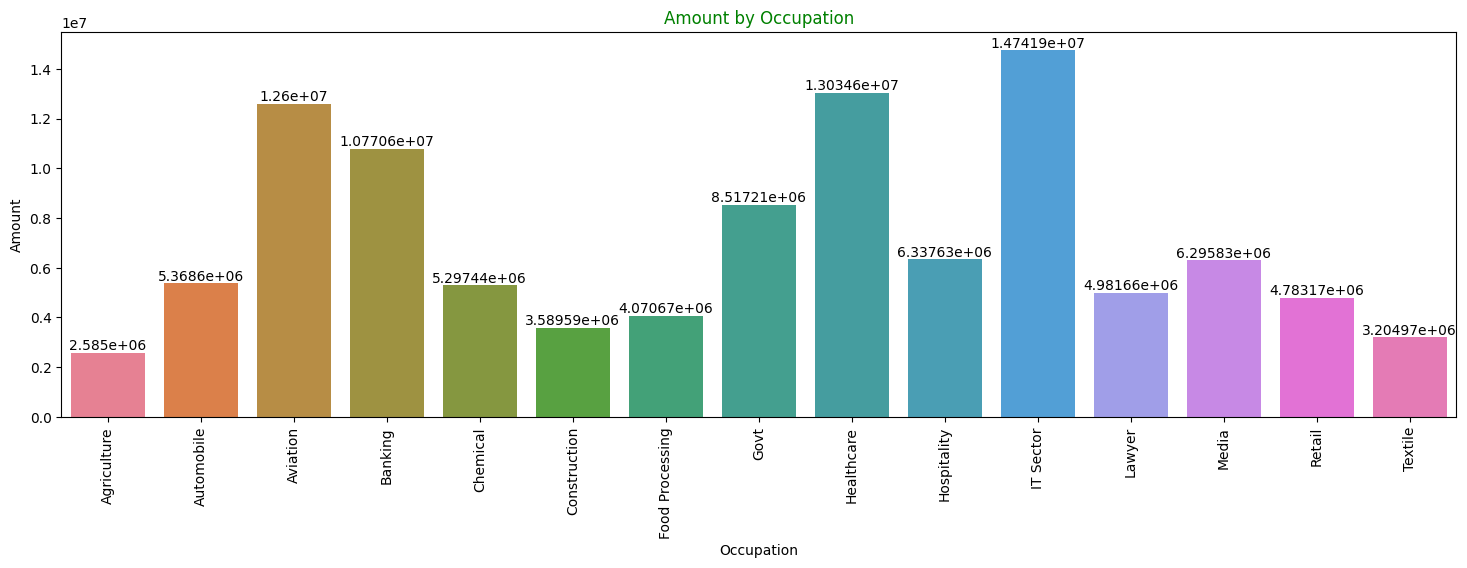

In [88]:
Occupation=df.groupby('Occupation')['Amount'].sum()
Occupation=pd.DataFrame(Occupation)
plt.figure(figsize=(18,5))
a=sns.barplot(x='Occupation',y='Amount',data=Occupation,hue='Occupation')
plt.title('Amount by Occupation',color='Green')
plt.xticks(rotation=90)
data_label(a)

**Total Spend is more in IT sector, Healthcare, Banking, Aviation, Govt**

### **Visualizing Product_Category**

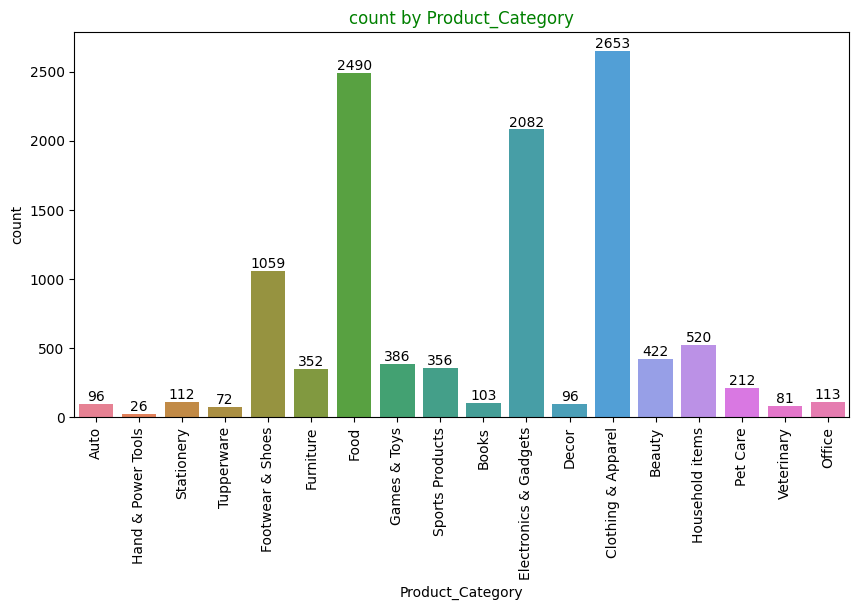

In [110]:
plt.figure(figsize=(10,5))
a=sns.countplot(x='Product_Category',data=df,hue='Product_Category')
plt.title('count by Product_Category',color='green')
plt.xticks(rotation=90)
data_label(a)

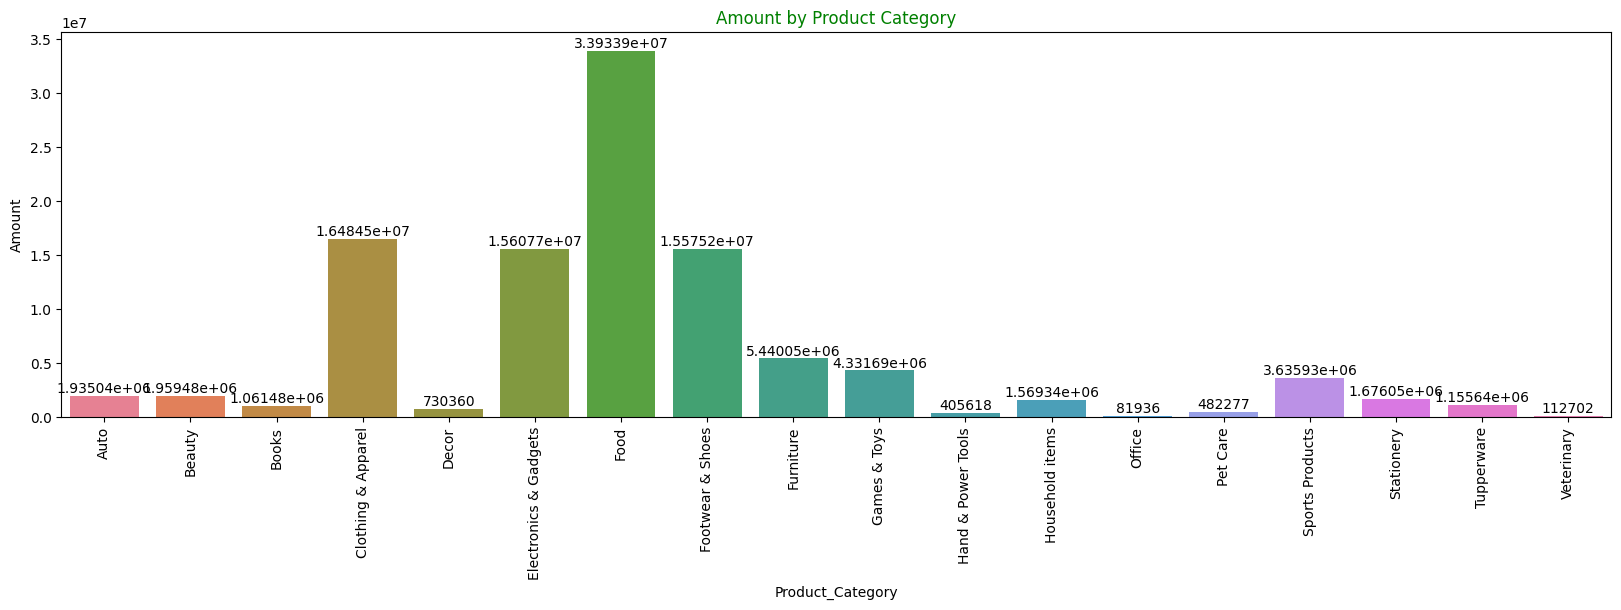

In [90]:
Product_Category=df.groupby('Product_Category')['Amount'].sum()
Product_Category=pd.DataFrame(Product_Category)
plt.figure(figsize=(20,5))
a=sns.barplot(x='Product_Category',y='Amount',data=Product_Category,hue='Product_Category')
plt.title('Amount by Product Category',color='Green')
plt.xticks(rotation=90)
data_label(a)

**Customers are spending more on Food, Clothing & Apparel, Electronics & gadgets, Footwear & shoes.**

# **Final Conclusion:**

## **Based on the above analysis i can conclude that**

### **1.Female are spending more compared to males.**

### **2.customers within age group of 26-35 are spending more**

### **3.Customers who are single are spending more amount**

### **4. Amount spend is more in Uttar Pradesh, Maharashtra, karnataka, delhi, madhya pradesh, Andhra pradesh**

### **5.Compare to other Zones peoples are spending more money in Central zone**

### **6. Amount Spend is more in IT sector, Healthcare, Banking, Aviation, Govt**

### **7. customers are spending more on Food, Clothing & Apparel, Electronics & gadgets, Footwear & shoes.**